In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import pickle
import matplotlib.image as mpimg
from moviepy.editor import VideoFileClip
from IPython.display import HTML
 
%matplotlib inline

In [2]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)#构建一个72行，3列的零矩阵
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)#把数组变成网格的顺序
 
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.
video_process_result=[]
 
# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

number: camera_cal/calibration15.jpg ret =  True


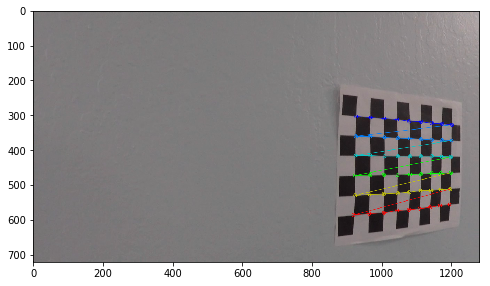

number: camera_cal/calibration14.jpg ret =  True


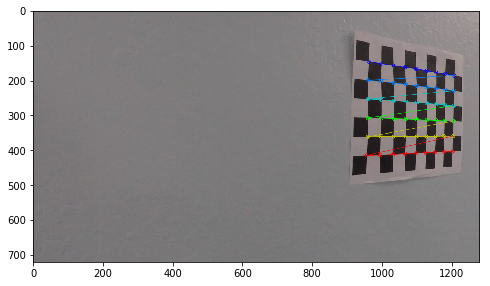

number: camera_cal/calibration11.jpg ret =  True


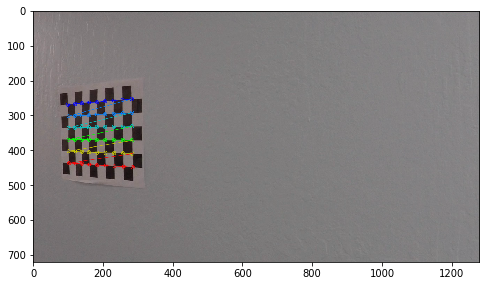

number: camera_cal/calibration6.jpg ret =  True


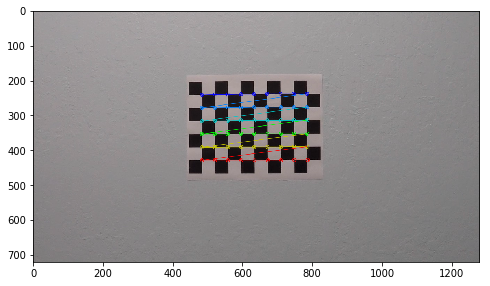

number: camera_cal/calibration2.jpg ret =  True


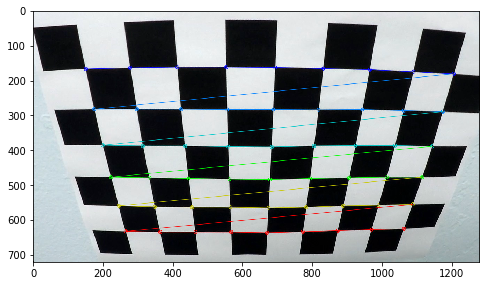

number: camera_cal/calibration13.jpg ret =  True


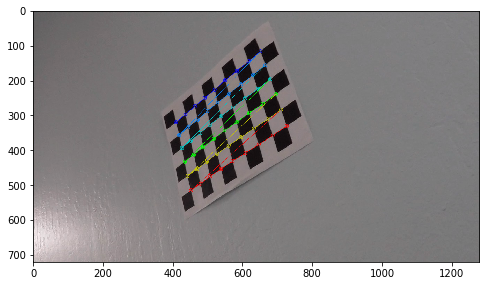

number: camera_cal/calibration12.jpg ret =  True


In [ ]:
# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
    print('number:',fname,'ret = ',ret)
 
    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
 
        # Draw and display the corners
        cv2.drawChessboardCorners(img, (9,6), corners, ret)
        #write_name = 'corners_found'+str(idx)+'.jpg'
        plt.figure(figsize = (8,8))
        plt.imshow(img)
        plt.show()

In [ ]:
img = cv2.imread('camera_cal/calibration1.jpg')
print(img.shape)
img_size = (img.shape[1],img.shape[0])
print(img_size)
# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)#标定
#这个函数会返回标定结果、相机的内参数矩阵、畸变系数、旋转矩阵和平移向量。
 
# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "camera_cal/wide_dist_pickle.p", "wb" ) )

In [ ]:
def undistort(img):
    cal_pickle = pickle.load(open("camera_cal/wide_dist_pickle.p", "rb"))
    mtx = cal_pickle['mtx']
    dist = cal_pickle['dist']
    undist = cv2.undistort(img,mtx,dist,None,mtx)
    return undist

In [ ]:
image_test = 'camera_cal/calibration1.jpg'
img_test = cv2.imread(image_test)
img_undistort = undistort(img_test)
img_test_undistort= 'camera_cal_output/calibration1_undistort.jpg'
plt.imsave(img_test_undistort, img_undistort)

plt.figure(figsize = (15,15))
plt.subplot(121)
plt.imshow(img_test)
plt.title('Original image')
 
plt.subplot(122)
plt.imshow(img_undistort)
plt.title('Undistort image')

In [ ]:
image_test = 'test_images/test1.jpg'
img_test = plt.imread(image_test)
img_undistort = undistort(img_test)

img_test_undistort= 'test_images_output/test1_undistort.jpg'
plt.imsave(img_test_undistort, img_undistort)
 
plt.figure(figsize = (15,15))
plt.subplot(121)
plt.imshow(img_test)
plt.title('Original image')
 
plt.subplot(122)
plt.imshow(img_undistort)
plt.title('Undistort image')

In [ ]:
#define functions
def grayscale(img):
    return cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
 
def gaussian_blur(img,kernel_size):
    return cv2.GaussianBlur(img,(kernel_size,kernel_size),0)
 
def abs_sobel_thresh(img,orient = 'x',sobel_kernel = 3,thresh = (0,255)):
    gray = grayscale(img)
    
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray,cv2.CV_64F,1,0,ksize = sobel_kernel))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray,cv2.CV_64F,0,1,ksize = sobel_kernel))
    
    scaled_sobel = np.uint8(255 * abs_sobel / np.max(abs_sobel))
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    return binary_output
 
def mag_thresh(img, sobel_kernel=3, thresh=(0, 255)):
 
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separatel
    sobel_x = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize = sobel_kernel)
    #print(sobel_x)
    sobel_y = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize = sobel_kernel)
    # 3) Calculate the magnitude 
    magnitude = np.sqrt(sobel_x ** 2 + sobel_y ** 2)
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scale_factor = np.max(magnitude) / 255
    #print('scale_factor = ',scale_factor)
    magnitude = (magnitude / scale_factor).astype(np.uint8)
    # 5) Create a binary mask where mag thresholds are met
    binary_output = np.zeros_like(magnitude)
    # 6) Return this mask as your binary_output image
    binary_output[(magnitude >= thresh[0]) & (magnitude <= thresh[1])] = 1
    return binary_output
    
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    #print(absgraddir)
    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1
 
    # Return the binary image
    return binary_output
 
def hls_select(img, thresh=(0, 255)):
    # 1) Convert to HLS color space
    hls = cv2.cvtColor(img,cv2.COLOR_RGB2HLS)
    # 2) Apply a threshold to the S channel
    s_channel = hls[:,:,2]
    # 3) Return a binary image of threshold result
    binary_output = np.zeros_like(s_channel)
    binary_output[(s_channel > thresh[0]) & (s_channel <thresh[1])] = 1
    return binary_output

In [ ]:
image_test = 'test_images/straight_lines1.jpg'
#img_test = cv2.imread(image_test)
img_test = plt.imread(image_test)
plt.figure(figsize = (10,10))
 
undist = undistort(img_test)
plt.subplot(221)
plt.imshow(undist)
plt.title('Undistorted Iamge')
 
#cv2.imwrite('output_images/undist.jpg',undist)
plt.imsave('output_images/undist.jpg', undist)
 
x_sobel = abs_sobel_thresh(undist,thresh = (22,100))
plt.subplot(222)
plt.imshow(x_sobel,cmap = 'gray')
plt.title('x_sobel Gradients Image')
 
plt.imsave('output_images/x_sobel.jpg',x_sobel,cmap = 'gray')

color_transforms = hls_select(undist,thresh=(150,255))
plt.subplot(223)
plt.imshow(color_transforms,cmap = 'gray')
plt.title('Color Thresh Image')
 
plt.imsave('output_images/color_transforms.jpg',color_transforms,cmap = 'gray')
 
 
color_x_sobel = np.zeros_like(x_sobel)
color_x_sobel[ (color_transforms == 1) | (x_sobel) == 1 ] = 1
plt.subplot(224)
plt.imshow(color_x_sobel,cmap = 'gray')
plt.title('color and gradient image')
 
plt.imsave('output_images/color_x_sobel.png',color_x_sobel,cmap = 'gray')

In [ ]:
#找点
plt.imshow(color_x_sobel,cmap = 'gray')
print(color_x_sobel.shape)

plt.plot(650,470,'x')
plt.plot(640,700,'x')
plt.plot(270,700,'x')
plt.plot(270,520,'x')

In [ ]:
def warp(img):
    img_size = (img.shape[1],img.shape[0])
    
    src = np.float32([[(img_size[0] / 2) - 55, img_size[1] / 2 + 100],
    [((img_size[0] / 6) - 10), img_size[1]],
    [(img_size[0] * 5 / 6) + 60, img_size[1]],
    [(img_size[0] / 2 + 55), img_size[1] / 2 + 100]])
    dst = np.float32(
    [[(img_size[0] / 4), 0],
    [(img_size[0] / 4), img_size[1]],
    [(img_size[0] * 3 / 4), img_size[1]],
    [(img_size[0] * 3 / 4), 0]])
    M = cv2.getPerspectiveTransform(src,dst)
    #返回透视变换的映射矩阵，就是这里的M
    #对于投影变换，我们则需要知道四个点，
    #通过cv2.getPerspectiveTransform求得变换矩阵.之后使用cv2.warpPerspective获得矫正后的图片。
    
    Minv = cv2.getPerspectiveTransform(dst,src)
    
    warped = cv2.warpPerspective(img,M,img_size,flags = cv2.INTER_LINEAR)
    #主要作用：对图像进行透视变换，就是变形
    #https://blog.csdn.net/qq_18343569/article/details/47953843
    unpersp = cv2.warpPerspective(warped, Minv, img_size, flags=cv2.INTER_LINEAR)
    
    
    return warped, unpersp, Minv

In [ ]:
warped_img,unpersp, Minv = warp(color_x_sobel)
warped_img2, unpersp2, Minv2 = warp(undist)
plt.imsave('output_images/warped_img.jpg', warped_img2,cmap='gray') 
plt.imshow(warped_img,cmap = 'gray')
plt.show()
plt.imshow(unpersp,cmap = 'gray')
plt.show()

In [ ]:
def find_lines(img,print = True):
    #假设您已经创建了一个被扭曲的二进制图像，称为“binary_warped”
    #取图像下半部分的直方图
    histogram= np.sum(img[img.shape[0] //2:,:],axis = 0)
    #创建一个输出图像来绘制和可视化结果
    out_img = np.dstack((img,img,img))
    # plt.imshow(out_img)
    # plt.show()
    #找出直方图的左半边和右半边的峰值
    #这些将是左行和右行的起点
    midpoint = np.int(histogram.shape[0] // 2)
    leftx_base = np.argmax(histogram[:midpoint])
    #np.argmax 是返回最大值所在的位置
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint
    #这里是要返回右边HOG值最大所在的位置，所以要加上midpoint
 
    #选择滑动窗口的数量
    nwindows = 9
    #设置窗口的高度
    window_height = np.int(img.shape[0] // nwindows)
    #确定所有的x和y位置非零像素在图像,这里就是吧img图像中非0元素（就是不是黑的地方就找出来，一行是x，一行是y）
    nonzero = img.nonzero()
    #返回numpy数组中非零的元素
    #对于二维数组b2，nonzero(b2)所得到的是一个长度为2的元组。http://www.cnblogs.com/1zhk/articles/4782812.html
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    #为每个窗口当前位置更新
    leftx_current = leftx_base
    rightx_current = rightx_base
    #设置窗口的宽度+ / -
    margin = 100
    #设置最小数量的像素发现重定位窗口
    minpix = 50
    #创建空的列表接收左和右车道像素指数
    left_lane_inds = []
    right_lane_inds = []
 
    #遍历窗口
    for window in range(nwindows):
        #识别窗口边界在x和y(左、右)
        win_y_low = img.shape[0] - (window + 1) * window_height #就是把图像切成9分，一分一分的算HOG
        #print('win_y_low',win_y_low)
        win_y_high = img.shape[0] - window * window_height
        win_xleft_low = leftx_current - margin
        #print('win_xleft_low',win_xleft_low)
        win_xleft_high = leftx_current + margin
        #print('win_xleft_high = ',win_xleft_high)
        win_xright_low = rightx_current - margin
        #print('win_xright_low = ',win_xright_low)
        win_xright_high = rightx_current + margin
        #print('win_xright_high = ',win_xright_high)
        #把网格画在可视化图像上
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0),2)#通过确定对角线 画矩形
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0),2)
 
    #     plt.imshow(out_img)
    #     plt.show()
    #     print('left !!!! ',win_xleft_low,win_y_low,win_xleft_high,win_y_high)
    #     print('right !!!!! ',win_xright_low,win_y_low,win_xright_high,win_y_high)
 
        #识别非零像素窗口内的x和y
        good_left_inds = (  (nonzeroy >= win_y_low)  & (nonzeroy < win_y_high)  
                              & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
 
 
        good_right_inds = ( (nonzeroy >= win_y_low) & (nonzeroy < win_y_high) 
                              & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
 
        #添加这些指标列表
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        #如果上面大于minpix，重新定位下一个窗口的平均位置
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))
    
    #连接索引的数组
    left_lane_inds = np.concatenate(left_lane_inds)
    #把list改成numpy格式而已
    right_lane_inds = np.concatenate(right_lane_inds)
    
    #提取左和右线像素位置
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 
    
    #最小二乘多项式拟合。
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    #画图
    ploty = np.linspace(0,img.shape[0] -1,img.shape[0]) #用此来创建等差数列
    left_fitx = left_fit[0] * ploty ** 2 + left_fit[1] * ploty +left_fit[2]
    right_fitx = right_fit[0] * ploty ** 2 +right_fit[1] * ploty + right_fit[2]
    #这步的意思是把曲线拟合出来，
 
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
    
    if print == True:
        plt.figure(figsize=(8,8))
        
        plt.imshow(out_img)
        plt.plot(left_fitx, ploty, color='yellow')
        plt.plot(right_fitx, ploty, color='yellow')
        plt.show()
    
    return out_img,left_fit,right_fit

In [ ]:
find_line_imgae,left_fit,right_fit = find_lines(warped_img)
plt.imsave('output_images/find_line_imgae.jpg', find_line_imgae,cmap='gray')

In [ ]:
def curvature(left_fit,right_fit,binary_warped,print_data = True):
    ploty = np.linspace(0,binary_warped.shape[0] -1 , binary_warped.shape[0])
    y_eval = np.max(ploty)
    #y_eval就是曲率，这里是选择最大的曲率
    
    ym_per_pix = 30/720#在y维度上 米/像素
    xm_per_pix = 3.7/700#在x维度上 米/像素
    
    #确定左右车道
    leftx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    rightx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    #定义新的系数在米
    left_fit_cr = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)
    #最小二乘法拟合
    
    #计算新的曲率半径
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    
    curvature = ((left_curverad + right_curverad) / 2)
    lane_width = np.absolute(leftx[719] - rightx[719])
    lane_xm_per_pix = 3.7 / lane_width
    veh_pos = (((leftx[719] + rightx[719]) * lane_xm_per_pix) / 2.)
    cen_pos = ((binary_warped.shape[1] * lane_xm_per_pix) / 2.)
    center = veh_pos - cen_pos

    
    if print_data == True:
        #现在的曲率半径已经转化为米了
        print(left_curverad, 'm', right_curverad, 'm', center, 'm')
 
    return left_curverad, right_curverad, center

In [ ]:
import glob
import os
new_path = os.path.join("test_images/","*.jpg")
for infile in glob.glob(new_path):
    #读图
    img = plt.imread(infile)
    #畸变
    undist = undistort(img)
    #sobel算子
    x_sobel = abs_sobel_thresh(undist,thresh = (22,100))
    #hls颜色阈值
    color_transforms = hls_select(undist,thresh=(90,255))
    #sobel加hls
    color_x_sobel = np.zeros_like(x_sobel)
    color_x_sobel[ (color_transforms == 1) | (x_sobel) == 1 ] = 1
    #弯曲图像（warped）
    print()
    print('Image name = ',infile)
    warped_img,unpersp, Minv = warp(color_x_sobel)
    #画线
    find_line_imgae,left_fit,right_fit = find_lines(warped_img)
    #算曲率
    curvature(left_fit,right_fit,find_line_imgae)

In [ ]:
def show_info(img,left_cur,right_cur,center):
    #在图片中显示出曲率
    cur = (left_cur + right_cur) / 2
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    # 使用默认字体
    cv2.putText(img,'Curvature = %d(m)' % cur,(50,50),font,1,(255,255,255),2)
    #照片/添加的文字/左上角坐标/字体/字体大小/颜色/字体粗细
    #添加文字
    
    if center < 0:
        fangxiang = 'left'
    else:
        fangxiang = 'right'
        
    cv2.putText(img,'the angle is %.2fm of %s'%(np.abs(center),fangxiang),(50,100),font,1,(255,255,255),2)

In [ ]:
def draw_lines(undist,warped,left_fit,right_fit,left_cur,right_cur,center,show_img = True):
    #创建一个全黑的底层图去划线
    warp_zero = np.zeros_like(warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero,warp_zero,warp_zero))
    
    ploty = np.linspace(0,warped.shape[0]-1,warped.shape[0])
    #添加新的多项式在X轴Y轴
    left_fitx = left_fit[0] * ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0] * ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    #把X和Y变成可用的形式
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    #np.transpose 转置
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    #向上/向下翻转阵列。
    pts = np.hstack((pts_left, pts_right))
    #填充图像
    cv2.fillPoly(color_warp, np.int_([pts]), (255,0, 0))
    #透视变换
    newwarp = cv2.warpPerspective(color_warp, Minv, (color_warp.shape[1], color_warp.shape[0])) 
    #叠加图层
    result = cv2.addWeighted(undist, 1, newwarp, 0.5, 0)
    show_info(result, left_cur, right_cur, center)
    if show_img == True:
        plt.figure(figsize = (10,10))
        plt.imshow(result)
        plt.show()
    return result

In [ ]:
import glob
import os
new_path = os.path.join("test_images/","*.jpg")
for infile in glob.glob(new_path):
    print('the image is ',infile)
    #读图
    img = plt.imread(infile)
    #畸变
    undist = undistort(img)
   #sobel算子
    if infile == 'test_images/test1.jpg':
       x_sobel = abs_sobel_thresh(undist,thresh = (145,200))
       #mag_thresh
       mag_binary = mag_thresh(undist,thresh =(30,90))
       #dir_threshold
       dir_binary = dir_threshold(undist, sobel_kernel=15, thresh=(0.7, 1.3))
       #hls颜色阈值
       color_transforms = hls_select(undist,thresh=(215,255))      
    else:    
       x_sobel = abs_sobel_thresh(undist,thresh = (22,100))
       #mag_thresh
       mag_binary = mag_thresh(undist,thresh =(30,90))
       #dir_threshold
       dir_binary = dir_threshold(undist, sobel_kernel=15, thresh=(0.7, 1.3))
       #hls颜色阈值
       color_transforms = hls_select(undist,thresh=(150,255))
    #sobel加hls
    color_x_sobel = np.zeros_like(x_sobel)
    color_x_sobel[ (x_sobel == 1) | (color_transforms == 1) ] = 1
    
    #弯曲图像
    warped_img, unpersp, Minv = warp(color_x_sobel)
    #画线
    find_line_imgae,left_fit,right_fit = find_lines(warped_img,print = False)
    #算曲率
    left_curverad, right_curverad, center = curvature(left_fit,right_fit,find_line_imgae,print_data = False)
    #画图
    result = draw_lines(undist,warped_img,left_fit,right_fit,left_curverad,right_curverad,center)
    if infile== 'test_images/straight_lines2.jpg':
        plt.imsave('output_images/straight_lines2_curvature.jpg', result,cmap='gray')
    #plt.imsave('output_images/'+infile, result,cmap='gray')

In [ ]:
def check(left_fit, right_fit):
    #Performs a sanity check on the lanes
 
    #1. Check if left and right fit returned a value
    if len(left_fit) ==0 or len(right_fit) == 0:
        status = False
 
    else:
        #Check distance b/w lines
        ploty = np.linspace(0, 20, num=10 )
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
        delta_lines = np.mean(right_fitx - left_fitx)
        if delta_lines >= 600 and delta_lines <=800: #apprrox delta in pixels
            status = True
        else:
            status = False
        
#         # Calculate slope of left and right lanes at midpoint of y (i.e. 360)
#         L_0 = 2*left_fit[0]*360+left_fit[1]
#         R_0 = 2*right_fit[0]*360+right_fit[1]
#         delta_slope_mid =  np.abs(L_0-R_0)
        
#          # Calculate slope of left and right lanes at top of y (i.e. 720)
#         L_1 = 2*left_fit[0]*720+left_fit[1]
#         R_1 = 2*right_fit[0]*720+right_fit[1]
#         delta_slope_top =  np.abs(L_1-R_1)
        
#         #Check if lines are parallel at the middle
        
#         if delta_slope_mid<=0.1:
#             status = True
#         else:
#             status = False
            
    return status

In [ ]:
def process_video(img):
    #global last_left 
    #global last_right
    #global left_fit
    #global right_fit
    global video_process_result
    
    #畸变
    undist = undistort(img)
    #sobel算子
    x_sobel = abs_sobel_thresh(undist,thresh = (50,70))
    #hls颜色阈值
    color_transforms = hls_select(undist,thresh=(150,255))
    #sobel加hls
    color_x_sobel = np.zeros_like(x_sobel)
    color_x_sobel[ (x_sobel == 1) | (color_transforms == 1) ] = 1
    
    #弯曲图像
    warped_img, unpersp, Minv = warp(color_x_sobel)
    
    #画线
    find_line_imgae,left_fit,right_fit = find_lines(warped_img,print = False)  
    
    status = check(left_fit, right_fit)
    if status == True:
       # 算曲率
       left_curverad, right_curverad, center = curvature(left_fit, right_fit, find_line_imgae, print_data=False)
        # 画图
       result = draw_lines(undist, warped_img, left_fit, right_fit, left_curverad, right_curverad, center, show_img=False)
       video_process_result = result
       return result
    else:
       return video_process_result

In [ ]:
#Create video file pipeline
output = 'test_video.mp4'
clip1 = VideoFileClip("project_video.mp4")
#clip1 = VideoFileClip("project_video.mp4").subclip(20,28)
 
out_clip = clip1.fl_image(process_video) #NOTE: this function expects color images!!
%time out_clip.write_videofile(output, audio=False)

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(output))